https://visioneer.notion.site/01-0c21c21cf15344828ca6f1b26334f620

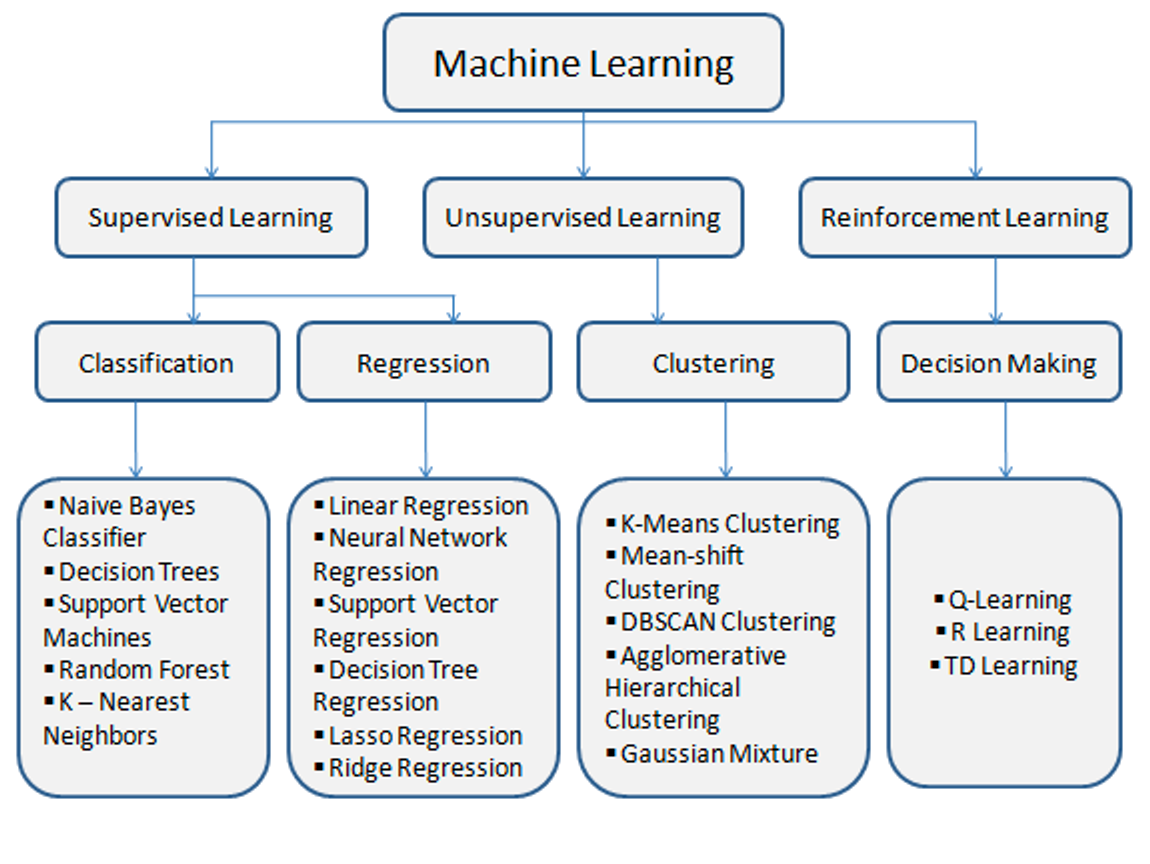

# 구글 티처블 머신
https://teachablemachine.withgoogle.com/

- 집 문에 CCTV 달아놨는데 ⇒ CCTV API ⇒ Teachable Machine ⇒ 몇시에 누가 집에 왔다.
- 구글 홈 ⇒ 헤이 구글 커튼 열어줘! (제 목소리만 되게끔)

# Sikit-Learn
- Tensorflow, Kras, Pytorch

In [ ]:
%pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
# iris classification

# load iris dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# feature data
data = iris.data
# label data
label = iris.target

# split train and test data (80:20)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 123)

In [ ]:
print(len(y_train), len(y_test))
print(x_train.shape)

120 30
(120, 4)


In [ ]:
y_test

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

In [ ]:
# train data : decison tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 123)
model.fit(x_train, y_train)

# predict class
prediction = model.predict(x_test)
prediction

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

In [ ]:
# get accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction) # (real y, predicted y)

0.9666666666666667

In [ ]:
# result df

df = pd.DataFrame(data = x_test, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.3,2.5,4.9,1.5
1,6.8,3.0,5.5,2.1
2,6.4,2.8,5.6,2.2
3,5.6,3.0,4.1,1.3
4,4.9,3.6,1.4,0.1
5,6.0,3.0,4.8,1.8
6,6.3,2.3,4.4,1.3
7,4.4,3.2,1.3,0.2
8,4.4,2.9,1.4,0.2
9,5.5,2.6,4.4,1.2


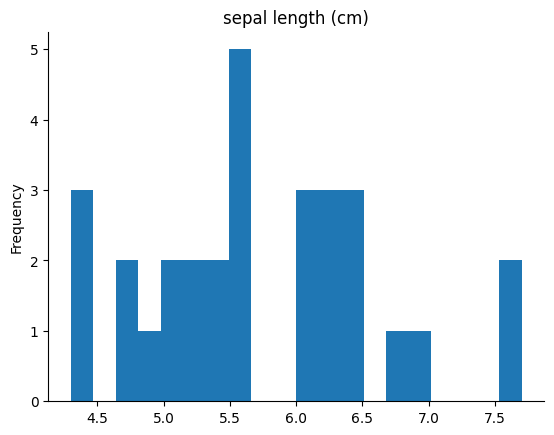

In [ ]:
# @title sepal length (cm)

from matplotlib import pyplot as plt
df['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['prediction'] = prediction
df['answer'] = y_test
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),prediction,answer
0,6.3,2.5,4.9,1.5,1,1
1,6.8,3.0,5.5,2.1,2,2
2,6.4,2.8,5.6,2.2,2,2
3,5.6,3.0,4.1,1.3,1,1
4,4.9,3.6,1.4,0.1,0,0


# cross validation
- K-fold
- Stratified K-fold : use for imbalanced data(e.g. 1000 abnoraml cases in 1 billion transactions)
- cross_val_score()


## K-fold case

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. load data
iris= load_iris()
data = iris.data
label = iris.target

# 2. split train and test data
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 10)

# 모델 학습 및 평가 함수 정의
def train_and_evaluate(train_index, val_index, model, train_data, train_label):
    # (train_index, val_index) from KFold(from sklearn.model_selection import KFold)
    # split (x_train, y_train) into validation set
    x_train, x_val = train_data[train_index], train_data[val_index]
    y_train, y_val = train_label[train_index], train_label[val_index]

    # model training
    model.fit(x_train, y_train)


    # model prediction
    prediction = model.predict(x_val)

    # compute accuracy : comparison real lable vs predicted label
    accuracy = accuracy_score(y_val, prediction)
    return accuracy

# KFold setting
kfold = KFold(n_splits = 6)
accuracy_list = [] # we will get six accurcies from kfold validation
# model selection
model = DecisionTreeClassifier()

In [ ]:
# k-fold validation implementation
for k, (train_idx_array, val_idx_array) in enumerate(kfold.split(x_train)):
    acc = train_and_evaluate(train_idx_array, val_idx_array, model, x_train, y_train)
    accuracy_list.append(acc)

    print("="*50)
    print(f'train {k} | accuray {acc} | train size {train_idx_array.shape[0]} | validation size {val_idx_array.shape[0]}')
    print(f'validation data index: {val_idx_array}')
    print("="*50)

# k-fold mean accuracy
print("k-fold mean accuracy: ", np.mean(accuracy_list))

train 0 | accuray 0.85 | train size 100 | validation size 20
validation data index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
train 1 | accuray 0.9 | train size 100 | validation size 20
validation data index: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
train 2 | accuray 0.95 | train size 100 | validation size 20
validation data index: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
train 3 | accuray 1.0 | train size 100 | validation size 20
validation data index: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
train 4 | accuray 0.8 | train size 100 | validation size 20
validation data index: [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
train 5 | accuray 1.0 | train size 100 | validation size 20
validation data index: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
k-fold mean accuracy:  0.9166666666666666


In [ ]:
# test set evaluation
test_pred = model.predict(x_test)

test_acc = accuracy_score(y_test, test_pred)
print(test_acc)

0.9666666666666667


In [ ]:
# result df
df = pd.DataFrame(data = x_test, columns = iris.feature_names)
df['prediction'] = test_pred
df['answer'] = y_test

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),prediction,answer
0,6.3,2.3,4.4,1.3,1,1
1,6.4,2.7,5.3,1.9,2,2
2,5.4,3.7,1.5,0.2,0,0
3,6.1,3.0,4.6,1.4,1,1
4,5.0,3.3,1.4,0.2,0,0
5,5.0,2.0,3.5,1.0,1,1
6,6.3,2.5,4.9,1.5,2,1
7,5.8,2.7,4.1,1.0,1,1
8,5.1,3.4,1.5,0.2,0,0
9,5.7,2.8,4.5,1.3,1,1


## Stratified K-fold case

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# load data
iris = load_iris()
data = iris.data
label = iris.target

# model initialize
model = DecisionTreeClassifier(random_state = 120)

# stratified k-fold setting
skfold = StratifiedKFold(n_splits = 3)
acc_list = []
n_iter = 0

# stratified k-fold implementation : skfold.split(x_data, y_data)
for (train_idx, val_idx) in skfold.split(data, label):
    acc = train_and_evaluate(train_idx, val_idx, model, data, label)
    acc_list.append(acc)
    n_iter += 1

    print("="*50)
    print(f'train {n_iter} | accuray {acc} | train size {train_idx.shape[0]} | validation size {val_idx.shape[0]}')
    print(f'validation data index: {val_idx}')
    print("="*50)

# k-fold mean accuracy
print("k-fold mean accuracy: ", np.mean(accuracy_list))


train 1 | accuray 0.98 | train size 100 | validation size 50
validation data index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
train 2 | accuray 0.94 | train size 100 | validation size 50
validation data index: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
train 3 | accuray 1.0 | train size 100 | validation size 50
validation data index: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
k-fold mean accuracy:  0.9166666666666666


## cross_val_score()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

result = cross_validate(dt_clf, data, label, cv=5, scoring=['accuracy'], return_train_score=True)

print(result)

{'fit_time': array([0.00229979, 0.0014255 , 0.00154734, 0.00149322, 0.00119638]), 'score_time': array([0.00060105, 0.00048614, 0.00050902, 0.00045919, 0.00040865]), 'test_accuracy': array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ]), 'train_accuracy': array([1., 1., 1., 1., 1.])}


### (2) 피처 엔지니어링(Feature Engineering)

- 머신러닝 알고리즘 학습에 용이한 데이터로 변경하는 과정
- 데이터를 정제하고 변환하여 모델이 패턴을 쉽게 인식하고 학습할 수 있도록 돕는다.

1. **숫자형 데이터로 변환**:
    
    대부분의 머신 러닝 모델은 숫자형 데이터를 입력으로 사용합니다. 따라서 문자열 데이터를 숫자로 변환하는 작업이 필요할 수 있습니다. 이를 위해 원-핫 인코딩, 레이블 인코딩, 범주형 특성을 숫자형으로 매핑하는 작업 등이 사용될 수 있습니다.
    
2. **누락된 데이터 처리**:
    
    데이터에서 누락된 값을 채우거나 해당 데이터 행 또는 열을 삭제할 수 있습니다. 이를 통해 모델이 더 나은 예측을 수행할 수 있도록 데이터를 정리할 수 있습니다.
    
3. **새로운 특성 생성**:
    
    기존 특성을 기반으로 새로운 특성을 만들어 모델에 추가할 수 있습니다. 예를 들어, 날짜 데이터에서 요일, 월, 연도 등의 정보를 추출하여 새로운 특성으로 사용할 수 있습니다.
    
4. **표준화 및 정규화**:
    
    데이터의 스케일을 조정하여 모델이 더 잘 동작하도록 만들 수 있습니다. 주로 연속형 숫자 특성을 표준화(평균 0, 표준 편차 1)하거나 정규화(0과 1 사이로 스케일 조정)하는 작업이 포함됩니다.
    
5. **이상치 처리**:
    
    이상치(outliers)는 모델의 성능을 왜곡시킬 수 있으므로 이를 식별하고 처리하는 것이 중요합니다. 이상치를 제거하거나 대체하는 방법을 사용할 수 있습니다.
    
6. **특성 선택**:
    
    중요한 특성을 선택하고 불필요한 특성을 제거함으로써 모델의 복잡성을 줄이고 성능을 향상시킬 수 있습니다.
    
7. **데이터 스케일링:**
다양한 특성(feature)들의 값 범위를 조정하여 모델의 성능을 향상시킵니다. 대표적인 방법으로는 정규화(normalization)나 표준화(standardization)가 있습니다.
8. **범주형 데이터 인코딩:**
범주형 변수들을 숫자 형태로 변환합니다. 원-핫 인코딩(One-hot encoding)이나 레이블 인코딩(Label encoding) 등이 사용됩니다.
    1. 데이터 카테고리를 숫자로 변경한다.
    2. 카테고리: 초등학생, 중학생, 고등학생, 대학생 ⇒ 0, 1, 2, 3 ⇒ 0.1, 0.2, 0.3
        - 단, 이 경우 특정 알고리즘에서는 큰 값이 좋다라는 잘못된 인식을 할 수가 있다.
            - ex) 냉장고 부피가 100, 컵의 부피가 10

## data encoding
- leabel encoding
    - 머신러닝에서 학습을 위한 데이터는 숫자형이어야 함. (문자열 데이터를 입력 받지 않음)
    - 모델에 따라서 값에 따른 숫자 크기의 차이가 영향을 미칠 수 있음
- one-hot encoding
- pd.get_dummies
    - a method to tranform categorical data into one-hot encoding in pandas DataFrame

### (4) Overfitting과 Underfitting

Overfitting: 과대적합(과적합)

- 훈련 데이터를 과도하게 학습을 하는 경우에 발생 (⇒모델의 복잡도 증가)
- 학습에서의 성능 평가는 높게 나올 수 있으나, 실전에 사용하기에는 어려움이 있음.

Underfitting: 과소적합

- 모델이 학습할 여지가 더 남아 있는 상태
*Epochs: 전체 데이터셋 학습 횟수

*Loss(RMSE): 예측 모델에서 예측한 값과 실제 값 사이의 평균 차이를 측정(작을수록 유사)

*Validation(실제 데이터)

**발생이유:**

- 인공지능은? ⇒ 내가 수집하고, 전처리한 데이터를 인공지능에게 학습시키는 과정이 포함됨 (최적화)
- 훈련 데이터 세트로 학습했을 때의 성능도 중요하지만 실전에서의 성능도 중요함.
- 훈련 데이터에 최적화 되는 것과 실전에 다양하게 사용될 수 있도록 일반화되는 것 사이에서 줄다리기

**결론:**

- 문제의 본질은 데이터. 훈련 데이터와 실전 데이터가 비슷하다면 오버피팅 문제가 발생하지 않겠죠.
- 너무 훈련 데이터에 집착을 하다보면 실전 상황에서의 대응이 힘들어질 수 있다.

**해결방법:**

- Training data(input data) - DA(Data augmentation)
    - 갖고 있는 데이터셋을 여러 가지 방법으로 augment하여 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법
    - 원래 이미지 한장을 ⇒ 크롭을 한다던지, RGB 색상을 변경한다던지, 회전을 시킨다던지
- Loss Function / Optimizer - L2 regularization
    - loss function에 패널티를 줘서 Optimer 포인트까지 가는 것을 막을 수도 있다.
- Target values - DisturbLabel
    - 의도적으로 틀린 답을 알려주는 방법
- Sampling - Weighted random sampling
    - 각 target의 갯수를 맞춰주는 방법
- Learning approach - Semi-supervised learning
    - target값이 없던 데이터를 가져와서 target값을 채워놓고 ⇒ 다시 이 데이터를 추가 후 학습 진행 ⇒ 반복..

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

items = ['강남구', '서초구', '송파구', '노원구', '마포구', '용산구', '마포구', '용산구']

# LabelEncoder 객체 생성 후 fit()과 transform()으로 label인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
# 문자열 -> 숫자형으로 변환
labels = encoder.transform(items)
print('label encoding result: ', labels)

label encoding result:  [0 3 4 1 2 5 2 5]


In [ ]:
import pandas as pd

df = pd.DataFrame({'item': ['강남구', '서초구', '송파구', '노원구', '마포구', '용산구', '마포구', '용산구']})
df

,item
0,강남구
1,서초구
2,송파구
3,노원구
4,마포구
5,용산구
6,마포구
7,용산구


In [ ]:
pd.get_dummies(df)

,item_강남구,item_노원구,item_마포구,item_서초구,item_송파구,item_용산구
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
5,0,0,0,0,0,1
6,0,0,1,0,0,0
7,0,0,0,0,0,1


In [ ]:
import pandas as pd

data = {'Fruit': ['Apple', 'Banana', 'Cherry', 'Apple', 'Cherry'],
        'Color': ['Red', 'Yellow', 'Red', 'Green', 'Red']}
df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df, columns=['Fruit', 'Color'], prefix=['Fruit', 'Color'])

# Titanic Survivors Prediction(Classification)